# Практична №7

Завдання на практичну роботу "Deep Learning Classification":

Завдання:

Створення власного набору даних для класифікації:

Бінарна класифікація: Створіть набір даних, де кожен запис представляє два числові атрибути та бінарний класовий лейбл (наприклад, "0" або "1"). Ці дані можуть бути синтетичними та містити, наприклад, оцінки студентів та їхній успіх (пройшов/не пройшов).
Мультикласова класифікація: Розширте набір даних для включення більше ніж двох класів (наприклад, "низький", "середній", "високий").
Побудова нейронної мережі для класифікації:

Розробіть нейронну мережу з трьома повнозв'язними шарами для класифікації. Використовуйте відповідні функції активації (наприклад, ReLU для прихованих шарів та sigmoid для виходу в бінарній класифікації або softmax для мультикласової).
Навчіть модель на вашому власному наборі даних для класифікації (50 епох) та оцініть її ефективність.
Експерименти з покращенням результатів:

Спробуйте побудувати більшу модель, додавши четвертий повнозв'язний шар.
Збільште кількість нейронів у кожному шарі.
Використовуйте оптимізатор Adam та експериментуйте із зміною його першого параметра (швидкість навчання) з використанням callback.
Протестуйте, як змінюється продуктивність моделі при тренуванні протягом 300 епох.
Візуалізація процесу навчання:

Здійсніть візуалізацію зміни функції втрат та точності на тренувальному та тестувальному наборах даних під час тренування моделі.

## Бінарна класифікація

Створіть набір даних, де кожен запис представляє два числові атрибути та бінарний класовий лейбл (наприклад, "0" або "1"). Ці дані можуть бути синтетичними та містити, наприклад, оцінки студентів та їхній успіх (пройшов/не пройшов).

Розробіть нейронну мережу з трьома повнозв'язними шарами для класифікації. Використовуйте відповідні функції активації (наприклад, ReLU для прихованих шарів та sigmoid для виходу в бінарній класифікації або softmax для мультикласової).
Навчіть модель на вашому власному наборі даних для класифікації (50 епох) та оцініть її ефективність.

Спробуйте побудувати більшу модель, додавши четвертий повнозв'язний шар.
Збільште кількість нейронів у кожному шарі.
Використовуйте оптимізатор Adam та експериментуйте із зміною його першого параметра (швидкість навчання) з використанням callback.

### Перша спроба (непрацююча)

In [122]:
import tensorflow as tf
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import LearningRateScheduler
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import accuracy_score, confusion_matrix

In [123]:
# Генерація синтетичних даних
np.random.seed(42)

# Генерація синтетичних даних для бінарної класифікації
X, y = make_classification(n_samples=5000, 
                           n_features=2, 
                           n_informative=2, 
                           n_redundant=0, 
                           n_clusters_per_class=1, 
                           random_state=42)

data = pd.DataFrame(data=X, columns=[f'Subject{i+1}' for i in range(2)])
data['Test_State'] = y

# Зберігаємо набір даних у CSV-файл
data.to_csv('data1_for_binary_classification.csv', index=False)
# Завантаження даних
data = pd.read_csv('data1_for_binary_classification.csv')

# Перегляд перших декількох рядків даних
print("---Перегляд перших декількох рядків даних---")
print(data.head(), "\n")

# Вивести інформацію про дані, такі як кількість рядків, стовпців і типи даних
print("---Вивід інформації про дані: к-сті рядків, стовпців, типу даних---")
print(data.info(), "\n")

# Вивести основні статистичні показники даних
print("---Основні статистичні показники даних---")
print(data.describe(), "\n")

---Перегляд перших декількох рядків даних---
   Subject1  Subject2  Test_State
0  1.852104  0.381771           1
1  2.661682 -1.516850           0
2  0.101813  0.052383           0
3  1.667594  0.501328           1
4 -0.253767 -1.749783           0 

---Вивід інформації про дані: к-сті рядків, стовпців, типу даних---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Subject1    5000 non-null   float64
 1   Subject2    5000 non-null   float64
 2   Test_State  5000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 117.3 KB
None 

---Основні статистичні показники даних---
          Subject1     Subject2  Test_State
count  5000.000000  5000.000000  5000.00000
mean      0.989995     0.005521     0.49980
std       1.001680     1.227274     0.50005
min      -3.701054    -3.885580     0.00000
25%       0.363925    -0.999083     0.00000
50%  

Reletive Plot Of Features


<Figure size 640x480 with 0 Axes>

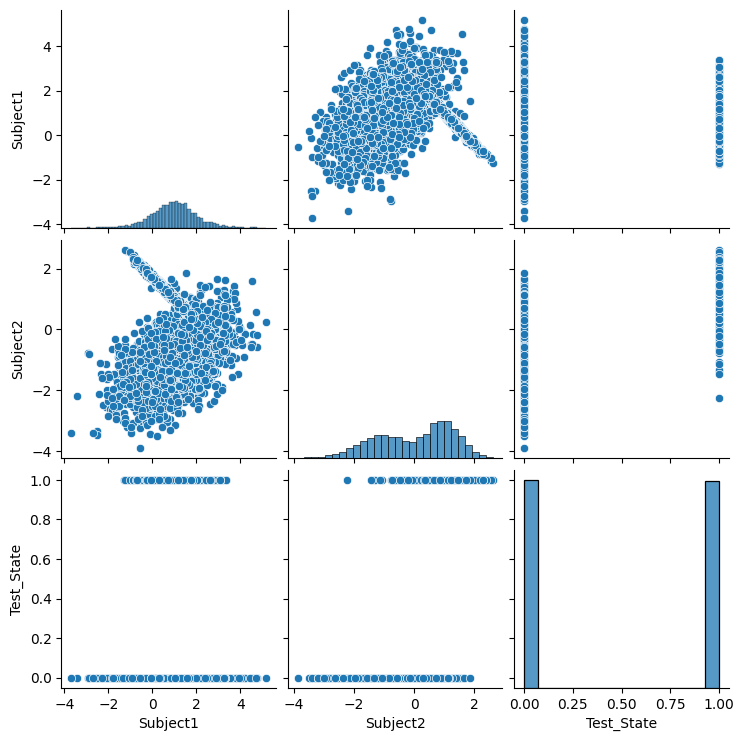

In [124]:
#To plot some selected features 

#Plotting following features
To_Plot = [ "Subject1", "Subject2", "Passed"]
print("Reletive Plot Of Features")
plt.figure()
sns.pairplot(data[To_Plot])

plt.show()

<Axes: >

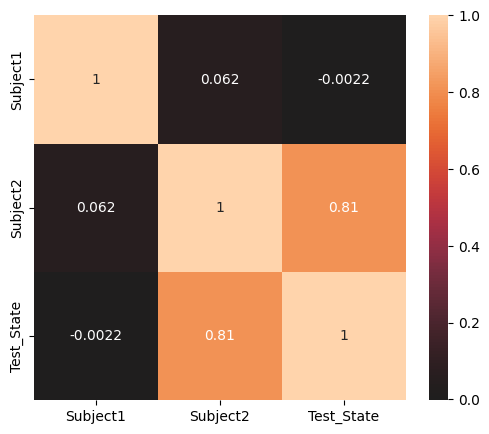

In [125]:
#correlation matrix
corrmat= data.corr()
plt.figure(figsize=(6,5))  
sns.heatmap(corrmat,annot=True, center=0)

In [126]:
# Create X & y values
X = data.drop("Passed", axis=1)
y = data["Passed"]

# Стандартизуємо дані
scaler = StandardScaler()
X = scaler.fit_transform(X)

# # View features
# X.head()

In [127]:
# Розділення на тренувальний та тестовий набори
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [128]:
# Check the shape of our data
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4000, 2), (1000, 2), (4000,), (1000,))

In [129]:
# Check shape of a single example
X_train[0].shape, X_test[0].shape

((2,), (2,))

In [130]:
# Check the min and max values of the training data
X_train.min(), X_test.max()

(-4.683650142315522, 2.9367312237204857)

In [131]:
# Нормалізація числових значень до діапазону [0, 1]
# scaler = MinMaxScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)
# Бінарна класифікація (зробити всі значення 0 або 1)
binarizer = LabelBinarizer()
X_train = binarizer.fit_transform(y_train)
X_test = binarizer.transform(y_test)

# Check the min and max values of the training data
X_train.min(), X_test.max()


(0, 1)

In [132]:
# Зміна форми масивів X_train та X_test за допомогою reshape
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1)).astype('float32')
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1)).astype('float32')

# Check the shape of our data
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4000, 1, 1), (1000, 1, 1), (4000,), (1000,))

In [133]:
# Нейронна мережа з трьома повнозв'язними шарами
model = Sequential([
    Dense(64, input_dim=2, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Компіляція моделі з оптимізатором Adam
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Функція для зміни швидкості навчання в залежності від епохи
def lr_scheduler(epoch, lr):
    if epoch < 10:
        return lr
    else:
        return lr * tf.math.exp(-0.1)

# Колбек для зміни швидкості навчання
lr_callback = LearningRateScheduler(lr_scheduler)

# Навчання моделі
model.fit(X_train, y_train, epochs=50, batch_size=32, callbacks=[lr_callback])

# # Оцінка ефективності моделі на тестовому наборі
# y_pred = model.predict(X_test)
# accuracy = accuracy_score(y_test, y_pred)
# print(f'Accuracy: {accuracy}')


Epoch 1/50


ValueError: in user code:

    File "d:\Lessons\1st Year of torment\Math\Anaconda\envs\myenv\lib\site-packages\keras\src\engine\training.py", line 1338, in train_function  *
        return step_function(self, iterator)
    File "d:\Lessons\1st Year of torment\Math\Anaconda\envs\myenv\lib\site-packages\keras\src\engine\training.py", line 1322, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "d:\Lessons\1st Year of torment\Math\Anaconda\envs\myenv\lib\site-packages\keras\src\engine\training.py", line 1303, in run_step  **
        outputs = model.train_step(data)
    File "d:\Lessons\1st Year of torment\Math\Anaconda\envs\myenv\lib\site-packages\keras\src\engine\training.py", line 1080, in train_step
        y_pred = self(x, training=True)
    File "d:\Lessons\1st Year of torment\Math\Anaconda\envs\myenv\lib\site-packages\keras\src\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "d:\Lessons\1st Year of torment\Math\Anaconda\envs\myenv\lib\site-packages\keras\src\engine\input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_12" is incompatible with the layer: expected shape=(None, 2), found shape=(32, 1, 1)


### Друга спроба (правильна, працююча)

In [324]:
import numpy as np

# Генерація синтетичних даних
np.random.seed(42)
num_samples = 1000

# Два числові атрибути (наприклад, оцінки студентів)
attribute1 = np.random.uniform(low=0, high=100, size=num_samples)
attribute2 = np.random.uniform(low=0, high=100, size=num_samples)

# Бінарний класовий лейбл (пройшов/не пройшов)
# Наприклад, якщо оцінка більше 50, то студент пройшов, інакше - не пройшов
binary_label = (attribute1 + attribute2) / 2 > 50

# Створення DataFrame для легшого управління даними (можна використовувати pandas)
import pandas as pd

data = pd.DataFrame({
    'Attribute1': attribute1,
    'Attribute2': attribute2,
    'Passed': binary_label.astype(int)
})

# Зберігаємо набір даних у CSV-файл
data.to_csv('data1_for_binary_classification.csv', index=False)

# Виведення перших кількох рядків даних
print(data.head())

X = np.column_stack((attribute1, attribute2))
y = binary_label.astype(int)

# Розділення на тренувальний та тестовий набори
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Побудова моделі Sequential
model = Sequential([
    Dense(64, input_dim=2, activation='relu'),
    Dense(128, activation='relu'),
    Dense(32, activation='relu'),
    Dense(10, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Компіляція моделі
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Тренування моделі
history = model.fit(X_train, y_train, epochs=40, batch_size=32, validation_data=(X_test, y_test))

# Оцінка ефективності моделі на тестовому наборі
y_pred = model.predict(X_test)
test_loss, test_acc = model.evaluate(X_train, y_train)
# accuracy = accuracy_score(y_test, y_pred)
print(f'Test accuracy: {test_acc}')
print(f'Test loss: {test_loss}')

   Attribute1  Attribute2  Passed
0   37.454012   18.513293       0
1   95.071431   54.190095       1
2   73.199394   87.294584       1
3   59.865848   73.222489       1
4   15.601864   80.656115       0
Epoch 1/40
25/25 [==============================] - 3s 28ms/step - loss: 1.3014 - accuracy: 0.5050 - val_loss: 0.6893 - val_accuracy: 0.4450
Epoch 2/40
25/25 [==============================] - 0s 5ms/step - loss: 0.6214 - accuracy: 0.5537 - val_loss: 0.6015 - val_accuracy: 0.6050
Epoch 3/40
25/25 [==============================] - 0s 7ms/step - loss: 0.5667 - accuracy: 0.6550 - val_loss: 0.6026 - val_accuracy: 0.6350
Epoch 4/40
25/25 [==============================] - 0s 6ms/step - loss: 0.5653 - accuracy: 0.6525 - val_loss: 0.5925 - val_accuracy: 0.6250
Epoch 5/40
25/25 [==============================] - 0s 6ms/step - loss: 0.5496 - accuracy: 0.6662 - val_loss: 0.5829 - val_accuracy: 0.6650
Epoch 6/40
25/25 [==============================] - 0s 6ms/step - loss: 0.5424 - accuracy: 0.66

In [325]:
y_test[:10]

array([1, 1, 1, 0, 1, 1, 0, 0, 0, 1])

<Axes: title={'center': 'Model History'}>

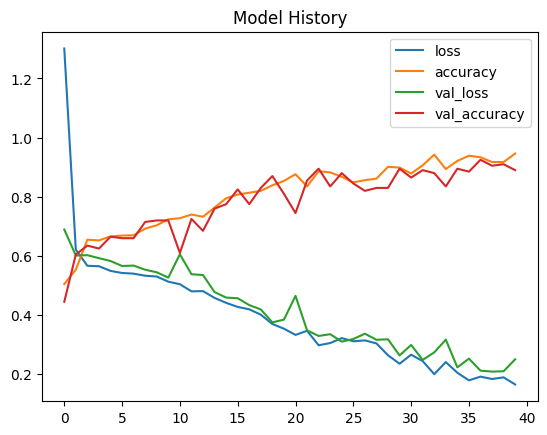

In [326]:
# Plot non-normalized data loss curves
pd.DataFrame(history.history).plot(title="Model History")

In [327]:
# Всі передбачені значення
p_pred = y_pred.flatten()
print(p_pred.round(2))

[0.92 0.93 0.93 0.39 0.93 0.97 0.12 0.17 0.12 0.97 1.   0.95 0.72 0.06
 0.03 0.23 1.   0.23 0.73 0.   1.   0.95 0.01 0.01 0.78 0.9  1.   0.98
 0.33 0.94 0.7  1.   0.   1.   0.64 1.   0.1  1.   0.01 0.36 0.65 0.25
 0.02 0.   0.13 1.   0.87 0.02 0.1  0.07 0.6  0.09 1.   0.59 0.93 0.1
 0.29 0.   0.31 0.93 0.87 1.   0.1  0.81 0.   0.61 0.99 0.   0.94 0.76
 0.99 0.   0.17 0.49 1.   0.25 0.48 0.28 0.22 0.68 1.   0.   0.11 0.86
 0.   0.06 0.85 0.01 0.05 0.96 1.   0.77 0.99 0.95 0.51 0.   0.   1.
 0.07 0.01 0.77 1.   0.   0.97 0.1  0.   0.97 0.99 0.01 1.   0.17 0.81
 0.09 0.52 0.99 0.94 0.01 0.97 0.95 0.35 1.   0.99 0.16 0.59 0.01 0.99
 0.15 0.97 0.   1.   0.23 0.87 0.64 0.1  1.   0.99 1.   0.01 0.98 0.01
 0.7  0.58 0.   0.54 0.05 0.78 1.   0.06 0.36 0.75 0.36 0.64 0.01 0.47
 0.5  0.75 0.58 0.31 0.89 0.9  0.49 0.99 0.85 0.01 0.99 0.   0.92 0.34
 0.98 0.05 0.63 0.65 0.63 1.   0.01 0.75 0.18 0.05 0.62 0.13 0.54 0.01
 0.01 0.16 0.07 0.98 0.99 0.03 0.97 0.44 0.98 0.2  0.16 0.85 0.44 1.
 0.   0.   

In [328]:
# Беру тільки значення 1 чи 0
y_pred = np.where(p_pred > 0.5, 1, 0)
print(y_pred)

[1 1 1 0 1 1 0 0 0 1 1 1 1 0 0 0 1 0 1 0 1 1 0 0 1 1 1 1 0 1 1 1 0 1 1 1 0
 1 0 0 1 0 0 0 0 1 1 0 0 0 1 0 1 1 1 0 0 0 0 1 1 1 0 1 0 1 1 0 1 1 1 0 0 0
 1 0 0 0 0 1 1 0 0 1 0 0 1 0 0 1 1 1 1 1 1 0 0 1 0 0 1 1 0 1 0 0 1 1 0 1 0
 1 0 1 1 1 0 1 1 0 1 1 0 1 0 1 0 1 0 1 0 1 1 0 1 1 1 0 1 0 1 1 0 1 0 1 1 0
 0 1 0 1 0 0 0 1 1 0 1 1 0 1 1 0 1 0 1 0 1 0 1 1 1 1 0 1 0 0 1 0 1 0 0 0 0
 1 1 0 1 0 1 0 0 1 0 1 0 0 0 0]


In [329]:
print(confusion_matrix(y_test, y_pred))

[[92 19]
 [ 3 86]]


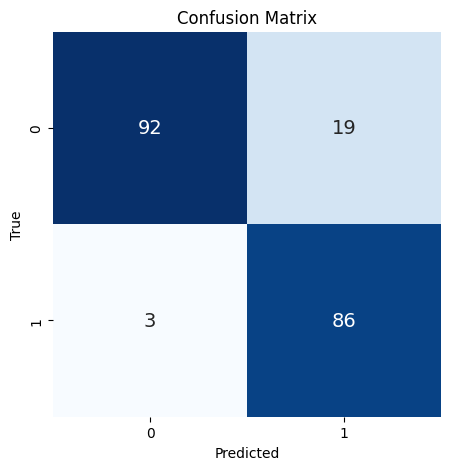

In [330]:
# Матриця помилок
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=False, annot_kws={"size": 14})
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')

plt.show()

## Мультикласова класифікація

Мультикласова класифікація: Розширте набір даних для включення більше ніж двох класів (наприклад, "низький", "середній", "високий").

### Генерація даних

In [331]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Генерація синтетичних даних для мультикласової класифікації
np.random.seed(42)
num_samples = 7000

attribute1 = np.random.uniform(low=0, high=100, size=num_samples)
attribute2 = np.random.uniform(low=0, high=100, size=num_samples)
attribute3 = np.random.uniform(low=0, high=100, size=num_samples)

# Задаємо логіку для визначення label
labels = np.zeros(num_samples)
labels[(attribute1 + attribute2 + attribute3) / 3 > 50] = 1
labels[(attribute1 + attribute2 + attribute3) / 3 > 75] = 2

# Mapping числових класів у one-hot encoding
X = np.column_stack((attribute1, attribute2, attribute3))
y = tf.keras.utils.to_categorical(labels, num_classes=3)

# Створення DataFrame для легшого управління даними (можна використовувати pandas)
import pandas as pd

data = pd.DataFrame({
    'Math': attribute1,
    'Art': attribute2,
    'English': attribute3,
    'Results': labels
})

# Зберігаємо набір даних у CSV-файл
data.to_csv('data2_for_multiclass_classification.csv', index=False)

data.head(10)

,Math,Art,English,Results
0,37.454012,3.879945,7.317510,0.0
1,95.071431,18.677253,8.947838,0.0
2,73.199394,83.124581,65.197371,1.0
3,59.865848,76.676836,48.694071,1.0
4,15.601864,35.064269,79.041525,0.0
5,15.599452,37.681063,91.627084,0.0
6,5.808361,53.355443,38.836688,0.0
7,86.617615,0.024100,59.641003,0.0
8,60.111501,24.124434,50.069663,0.0
9,70.807258,20.823181,98.161066,1.0


### Перша модель

In [332]:
# Розділення на тренувальний та тестовий набори
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Побудова моделі Sequential
model = Sequential([
    Dense(64, input_dim=3, activation='relu'),
    Dense(32, activation='relu'),
    Dense(3, activation='softmax')  # Використовуємо softmax для мультикласової класифікації
])

# Компіляція моделі
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Тренування моделі
history2 = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Оцінка ефективності моделі на тестовому наборі
y_pred = model.predict(X_test)

test_loss1, test_acc1 = model.evaluate(X_train, y_train)
print(f'Test accuracy: {test_acc1}')
print(f'Test loss: {test_loss1}')

Epoch 1/10
175/175 [==============================] - 3s 6ms/step - loss: 1.4218 - accuracy: 0.6137 - val_loss: 0.6306 - val_accuracy: 0.6571
Epoch 2/10
175/175 [==============================] - 1s 4ms/step - loss: 0.6298 - accuracy: 0.6850 - val_loss: 0.5719 - val_accuracy: 0.6757
Epoch 3/10
175/175 [==============================] - 1s 3ms/step - loss: 0.6058 - accuracy: 0.7114 - val_loss: 0.5115 - val_accuracy: 0.7714
Epoch 4/10
175/175 [==============================] - 1s 4ms/step - loss: 0.5402 - accuracy: 0.7504 - val_loss: 0.5346 - val_accuracy: 0.7629
Epoch 5/10
175/175 [==============================] - 1s 4ms/step - loss: 0.4941 - accuracy: 0.7871 - val_loss: 0.4872 - val_accuracy: 0.7464
Epoch 6/10
175/175 [==============================] - 1s 3ms/step - loss: 0.4935 - accuracy: 0.7730 - val_loss: 0.4448 - val_accuracy: 0.8157
Epoch 7/10
175/175 [==============================] - 1s 3ms/step - loss: 0.4341 - accuracy: 0.8171 - val_loss: 0.4191 - val_accuracy: 0.8343
Epoch 

<Axes: title={'center': 'Model History'}>

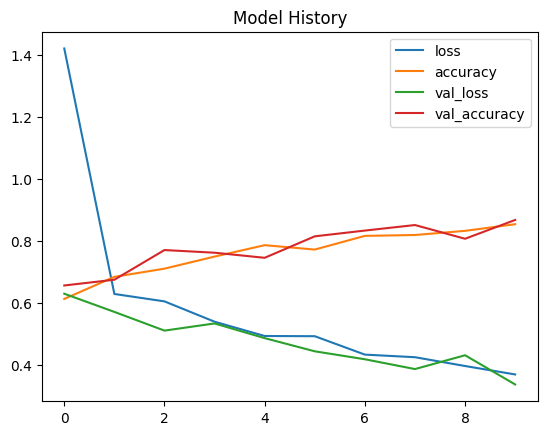

In [333]:
# Plot non-normalized data loss curves
pd.DataFrame(history2.history).plot(title="Model History")

In [334]:
# Всі передбачені значення
p_pred = y_pred.flatten()
print(p_pred.round(2))

[0.91 0.09 0.   ... 0.14 0.83 0.04]


In [335]:
# Беру тільки значення 1 чи 0
y_pred = np.where(p_pred > 0.5, 1, 0)
print(y_pred)

[1 0 0 ... 0 1 0]


In [336]:
y_test.shape, y_pred.shape

((1400, 3), (4200,))

In [337]:
# Reshape the array to (4200,)
y_test_r = y_test.reshape(4200)
y_test.shape

(1400, 3)

In [338]:
y_test_r

array([1., 0., 0., ..., 0., 1., 0.], dtype=float32)

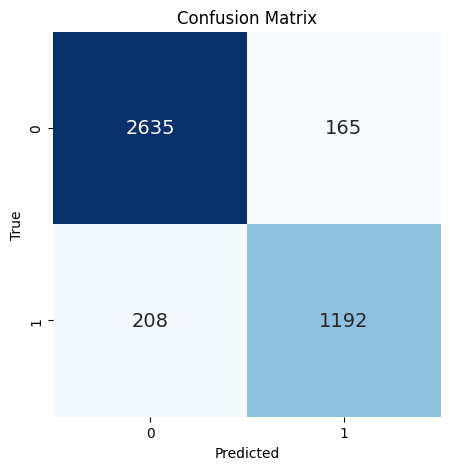

In [339]:
# Матриця помилок
cm = confusion_matrix(y_test_r, y_pred)
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=False, annot_kws={"size": 14})
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')

plt.show()

### Друга модель

In [340]:
# Розділення на тренувальний та тестовий набори
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Побудова моделі Sequential
model = Sequential([
    Dense(128, input_dim=3, activation='relu'),
    Dense(100, activation='relu'),
    Dense(10, activation='relu'),
    Dense(10, activation='relu'),
    Dense(3, activation='softmax')  # Використовуємо softmax для мультикласової класифікації
])

# Компіляція моделі
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Тренування моделі
history2 = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Оцінка ефективності моделі на тестовому наборі
y_pred = model.predict(X_test)

test_loss2, test_acc2 = model.evaluate(X_train, y_train)
print(f'Test accuracy: {test_acc2}')
print(f'Test loss: {test_loss2}')

Epoch 1/10
175/175 [==============================] - 4s 7ms/step - loss: 0.7622 - accuracy: 0.6266 - val_loss: 0.6049 - val_accuracy: 0.6786
Epoch 2/10
175/175 [==============================] - 1s 5ms/step - loss: 0.6340 - accuracy: 0.6762 - val_loss: 0.5661 - val_accuracy: 0.7036
Epoch 3/10
175/175 [==============================] - 1s 6ms/step - loss: 0.5765 - accuracy: 0.7039 - val_loss: 0.5819 - val_accuracy: 0.6679
Epoch 4/10
175/175 [==============================] - 1s 5ms/step - loss: 0.5476 - accuracy: 0.7355 - val_loss: 0.4887 - val_accuracy: 0.7814
Epoch 5/10
175/175 [==============================] - 1s 5ms/step - loss: 0.4845 - accuracy: 0.7804 - val_loss: 0.4557 - val_accuracy: 0.8029
Epoch 6/10
175/175 [==============================] - 1s 5ms/step - loss: 0.4515 - accuracy: 0.8025 - val_loss: 0.3916 - val_accuracy: 0.8679
Epoch 7/10
175/175 [==============================] - 1s 5ms/step - loss: 0.3931 - accuracy: 0.8320 - val_loss: 0.3140 - val_accuracy: 0.8686
Epoch 

<Axes: title={'center': 'Model History'}>

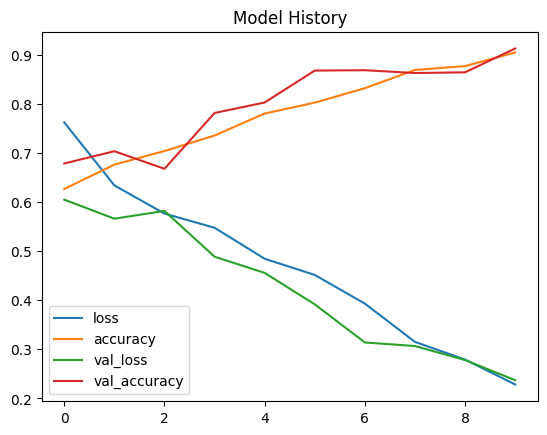

In [341]:
# Plot non-normalized data loss curves
pd.DataFrame(history2.history).plot(title="Model History")

In [342]:
# Всі передбачені значення
p_pred = y_pred.flatten()
print(p_pred.round(2))

[1.   0.   0.   ... 0.11 0.88 0.01]


In [343]:
# Беру тільки значення 1 чи 0
y_pred = np.where(p_pred > 0.5, 1, 0)
print(y_pred)

[1 0 0 ... 0 1 0]


In [344]:
y_test.shape, y_pred.shape

((1400, 3), (4200,))

In [345]:
# Reshape the array to (4200,)
y_test_r = y_test.reshape(4200)
y_test.shape

(1400, 3)

In [346]:
y_test_r

array([1., 0., 0., ..., 0., 1., 0.], dtype=float32)

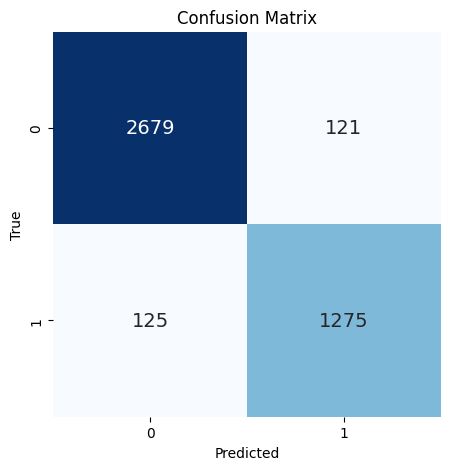

In [347]:
# Матриця помилок
cm = confusion_matrix(y_test_r, y_pred)
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=False, annot_kws={"size": 14})
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')

plt.show()

### Третя модель

In [372]:
# Розділення на тренувальний та тестовий набори
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Побудова моделі Sequential
model = Sequential([
    Dense(128, input_dim=3, activation='relu'),
    Dense(100, activation='relu'),
    Dense(10, activation='relu'),
    Dense(10, activation='relu'),
    Dense(3, activation='softmax')  # Використовуємо softmax для мультикласової класифікації
])

# Compile the model with the custom optimizer
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',  # Use categorical_crossentropy for multiclass classification
              metrics=['accuracy'])

# Тренування моделі
history2 = model.fit(X_train, y_train, epochs=200, batch_size=32, validation_data=(X_test, y_test))

# Оцінка ефективності моделі на тестовому наборі
y_pred = model.predict(X_test)

test_loss3, test_acc3 = model.evaluate(X_train, y_train)
print(f'Test accuracy: {test_acc2}')
print(f'Test loss: {test_loss2}')

Epoch 1/200
175/175 [==============================] - 4s 7ms/step - loss: 1.2773 - accuracy: 0.5489 - val_loss: 0.7765 - val_accuracy: 0.6557
Epoch 2/200
175/175 [==============================] - 1s 5ms/step - loss: 0.7536 - accuracy: 0.6434 - val_loss: 0.7153 - val_accuracy: 0.6607
Epoch 3/200
175/175 [==============================] - 1s 5ms/step - loss: 0.7130 - accuracy: 0.6579 - val_loss: 0.6900 - val_accuracy: 0.6643
Epoch 4/200
175/175 [==============================] - 1s 4ms/step - loss: 0.6870 - accuracy: 0.6616 - val_loss: 0.6541 - val_accuracy: 0.6707
Epoch 5/200
175/175 [==============================] - 1s 5ms/step - loss: 0.6555 - accuracy: 0.6682 - val_loss: 0.6319 - val_accuracy: 0.6864
Epoch 6/200
175/175 [==============================] - 1s 4ms/step - loss: 0.6325 - accuracy: 0.6791 - val_loss: 0.6091 - val_accuracy: 0.6900
Epoch 7/200
175/175 [==============================] - 1s 5ms/step - loss: 0.6079 - accuracy: 0.6896 - val_loss: 0.5832 - val_accuracy: 0.7221

<Axes: title={'center': 'Model History'}>

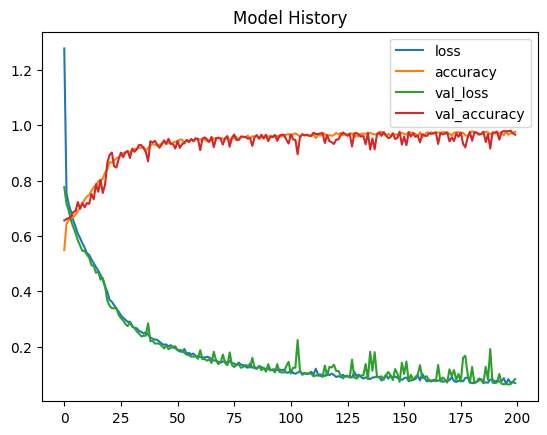

In [373]:
# Plot non-normalized data loss curves
pd.DataFrame(history2.history).plot(title="Model History")

In [374]:
# Всі передбачені значення
p_pred = y_pred.flatten()
print(p_pred.round(2))

[1. 0. 0. ... 0. 1. 0.]


In [375]:
# Беру тільки значення 1 чи 0
y_pred = np.where(p_pred > 0.5, 1, 0)
print(y_pred)

[1 0 0 ... 0 1 0]


In [376]:
y_test.shape, y_pred.shape

((1400, 3), (4200,))

In [377]:
# Reshape the array to (4200,)
y_test_r = y_test.reshape(4200)
y_test.shape

(1400, 3)

In [378]:
y_test_r

array([1., 0., 0., ..., 0., 1., 0.], dtype=float32)

### Підсумок

In [379]:
model_results = [["model_1", test_loss1, test_acc1],
                 ["model_2", test_loss2, test_acc2],
                 ["model_3", test_loss3, test_acc3]]

all_results = pd.DataFrame(model_results, columns=["model", "test_loss", "test_accuracy"])
all_results

,model,test_loss,test_accuracy
0,model_1,0.337920,0.874107
1,model_2,0.220996,0.915357
2,model_3,0.064778,0.976250
